In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X = boston.data
y = boston.target

In [8]:
# train, validation, test set 분리하는 method는 모두 sklearn의 model_selection 객체 안에 있음!!!
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):   # index를 반환해줌
    print("TRAIN - ", len(train_index))   # 각 fold별 data 개수
    print("TEST - ",  len(test_index))    

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [9]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
# CV mse 계산
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830231, 34.078246209259305)

In [10]:
# cross_val_score(): 바로 위의 for문을 요약한 함수!!
# 반드시 유의할 점!! : 여기서는 score를 큰 값을 좋은 것이라고 인식!!
#                     => 작을수록 좋은 지표(mse, ...)에는 "-"를 붙여줘야함!!!
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)   # warm_start=True: 초기값을 내가 지정하겠다는 옵션
ridge_regressor = Ridge()

# score 지표로서 negative를 붙여줌!!
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830231, -34.078246209259305)

In [11]:
# cross_validate(): cross_val_score()보다 다양한 정보(instance)를 담고 있음!!
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00299883, 0.00099993, 0.00299811, 0.00299859, 0.00199938,
        0.00199914, 0.00199723, 0.00100279, 0.00199914, 0.00399971]),
 'score_time': array([0.0029974 , 0.00199771, 0.00199938, 0.00199842, 0.00100064,
        0.00099993, 0.0010004 , 0.00099802, 0.00099707, 0.0039959 ]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'train_neg_mean_squared_error': array([-28.25616949, -28.09567503, -28.29232348, -25.600492  ,
        -26.95096346, -27.99388031, -28.4162528 , -16.87943219,
        -26.20686855, -27.76810381]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703]),
 'train_r2': array([0.68411229, 0.68946643, 0.68782251, 0.65147357, 0.67374543,
        0.62987343, 0.69067269, 0.77241751, 0.68011836

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)   # 10-fold를 하는데 shuffle해줌 => 위의 결과와 약간 다름

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.675538838628217, -23.894178452384015)

In [13]:
# LOOCV => 잘 안쓴다고 함
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [14]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.40926676204934, -23.86283631720995)

In [23]:
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.277056273281072, -24.44455419985513)

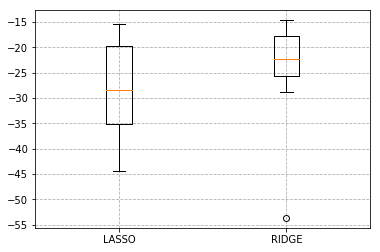

In [25]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [18]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [19]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01 
max_iter = 100

In [20]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):
    
    # train set으로 predict
    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))
    
    # validation set으로 predict
    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)   # fitting된 model을 list에 append
    
    # 특이하게 coefficients를 copy함
    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()
    
    # warm_start=True 옵션으로 초기값을 지정해줘야함!!
    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    # coef_init 옵션으로 위에서 copy 해놓은 coef를 초기값(initial value)로 사용!!
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)    

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol

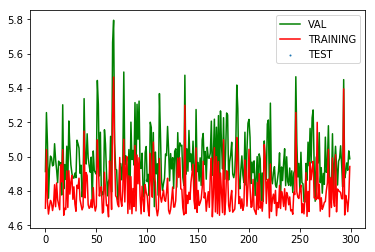

In [26]:
plt.plot(range(len(rmse_val_score)), rmse_val_score, c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score, c="r", label="TRAINING")
plt.scatter(99, rmse(y_test, sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [27]:
np.argsort(rmse_val_score)

array([107,  46, 255, 254, 265, 214, 212,  71,  83,   3, 147,  97,  36,
       209,  55, 231,  61, 102, 206, 111,  16,  72,  57, 272,  96, 243,
        56,  65, 220, 250, 115, 171, 283,  18, 191, 126,  37, 227, 129,
       292, 105, 281, 241, 236,  22, 153, 239, 136, 287, 197, 226, 274,
       280, 253, 223, 116, 202,  12, 270, 252, 167, 195, 100, 190, 238,
        62, 151, 122,  81, 233, 257, 180,  75, 217, 114, 176,  20, 158,
       228, 207,  63, 117,  28, 294,  27, 222,  30, 185, 135, 248,  53,
       279, 164, 194, 101, 138,  50, 169, 184, 109, 273,  34,  26,  29,
       213, 244,  60, 204, 295,  49, 224, 276,  44, 186, 149,   0,  89,
       140, 229, 242,  80,  48, 297, 144, 245,  70,  11, 192, 146,  69,
         4, 174, 124,  94,  93, 240, 271, 131, 232, 225, 286,   7, 259,
       264,  43, 216,  35,  87,  14, 291,   8,  25,  78,  19, 156,  73,
        40, 284, 110, 277,  74, 256, 249,  76, 268, 296, 261,  15, 234,
       150, 203, 142, 181, 288,  13, 205,  10,  85,  39, 211, 29

In [28]:
# 가장 마지막에 fitting된 model로 predict
rmse(y_test, sgd_regressor.predict(X_test))

4.867084148452406

In [30]:
# mse가 가장 작은 model로 predict
rmse(y_test, model_list[107].predict(X_test))

4.848669013455721

In [32]:
# mse가 가장 작은 model의 coefficients
model_list[107].coef_

array([-0.99860897,  0.7007963 ,  0.10943766,  0.20265432, -2.28797996,
        2.43608679, -0.06765831, -2.93135363,  1.95043573, -1.47005159,
       -1.69670176,  1.30344193, -3.01955299])